<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/day1/DL4CV_01_Introduction_to_OpenCV_%26_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/matteoalberti/Lectures_introCV_Experis2020/blob/main/images/intro.jpg?raw=1)

# **Welcome!**

## Introduction to Machine Learning for Computer Vision : Load Images and OpenCV



## **Lecturer :** Matteo Alberti
*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary

- <font color=BE3315>**Introduction to Computer Vision datasets** </font> 
- <font color=E15234>**Standart preprocessing to images** </font> 
- <font color=EF8932>**filtering and denoising** </font> 

#### Load Packages

In [ ]:
import cv2
import platform
import numpy as np
import tensorflow as tf
import sklearn.model_selection as model_selection

#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")

print('Python Version : ', platform.python_version())
print('TF Version : ', tf.__version__)

Python Version :  3.6.9
TF Version :  2.3.0


## First Alternative

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## Second Way!

##### Load Cifar10 data from Local File
available at: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
data_path = './data/Interactive_Session'

# necessary for load our data
batch_id = 3
sample_id = 7000

In [ ]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(batch_id, sample_id):

    features, labels = x_train, np.concatenate(y_train, axis=0)

    # if you have to load from mem use : features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[0]
    sample_label = labels[0]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)
    return features, labels

##### Visulize Data & Stats


Stats of batch #3:
# of Samples: 50000

Label Counts of [0](AIRPLANE) : 5000
Label Counts of [1](AUTOMOBILE) : 5000
Label Counts of [2](BIRD) : 5000
Label Counts of [3](CAT) : 5000
Label Counts of [4](DEER) : 5000
Label Counts of [5](DOG) : 5000
Label Counts of [6](FROG) : 5000
Label Counts of [7](HORSE) : 5000
Label Counts of [8](SHIP) : 5000
Label Counts of [9](TRUCK) : 5000

Example of Image 7000:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 6 Name: frog


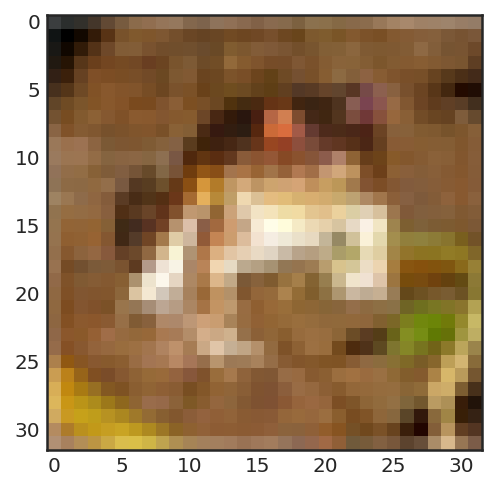

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
features, labels = display_stats(batch_id, sample_id)

##### Split out Data

*We have train and test. What else do we need?*


In [ ]:
print("size of train % : {}".format(round((x_train.shape[0]) / (x_train.shape[0]+x_test.shape[0])*100, 2)))
print("size of test % : {}".format(round((x_test.shape[0]) / (x_train.shape[0]+x_test.shape[0])*100, 2)))

size of train % : 83.33
size of test % : 16.67


In [ ]:
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test,y_test, 
                                                                    train_size=0.5,
                                                                    test_size=0.5, random_state=10)

print(x_train.shape,y_train.shape, x_val.shape, y_val.shape, x_test.shape,y_test.shape, "\n")
print("size of train % : {}".format(round((x_train.shape[0]) / (x_train.shape[0]+x_test.shape[0]+x_val.shape[0])*100, 2)))
print("size of val % : {}".format(round((x_val.shape[0]) / (x_train.shape[0]+x_test.shape[0]+x_val.shape[0])*100, 2)))
print("size of test % : {}".format(round((x_test.shape[0]) / (x_train.shape[0]+x_test.shape[0]+x_val.shape[0])*100, 2)))

(50000, 32, 32, 3) (50000, 1) (5000, 32, 32, 3) (5000, 1) (5000, 32, 32, 3) (5000, 1) 

size of train % : 83.33
size of val % : 8.33
size of test % : 8.33


#### Checks from previous course :

*Why don't we split in the following way?*

```
x_train = features[:int((features.shape[0]/100)*70)]
y_train = labels[:int((features.shape[0]/100)*70)]
y_train = np.asarray(y_train)

x_test = features[:features.shape[0] - x_train.shape[0]]
y_test = labels[:features.shape[0] - x_train.shape[0]]
y_test = np.asarray(y_test)

x_val = x_test[:2000]
x_test = x_test[2000:]

y_val = y_test[:2000]
y_test = y_test[2000:] 
```


First of all :

    Computers 'look' at images as multidimensional arrays or matricies but they can also be treated like functions
    

In [ ]:
x_train[0][0][:10]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93]], dtype=uint8)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Which king of Encoding is this?

*Answer :*

#### Brief Recap?


Let me explain with 4 classes and 4 vs 2 bit encoding

dog, cat, bird, tuna 

2 bit encoding :

    dog = 00
    cat = 01
    bird = 10
    tuna = 11

But dog<cat<bird<tuna?

Obviosly not.. so that we need to encode in another way :

    dog = 0000
    cat = 0010
    bird = 0100
    tuna = 1000


Many times, images contain complex information that isn't need for a computation or reduces the speed of computation without much value added.

## Normalize data

In [ ]:
print('Range : ', np.amin(x_train[0]),' - ', np.amax(x_train[0]))

Range :  0  -  255


In [ ]:
x_train[0][0][:10]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93]], dtype=uint8)

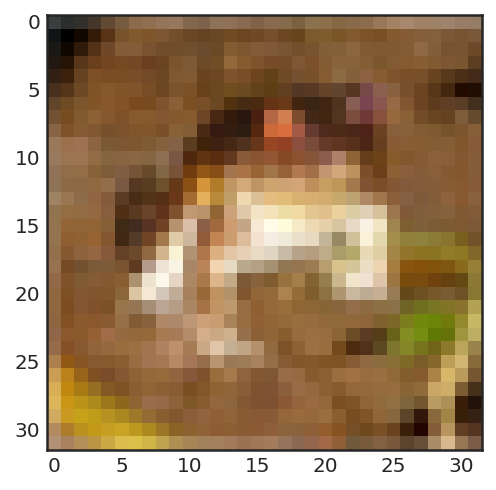

In [ ]:
plt.imshow(x_train[0])

In [ ]:
#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0][0][:10]

array([[0.10196079, 0.09019608, 0.1254902 ],
       [0.06666667, 0.05490196, 0.09803922],
       [0.05098039, 0.03529412, 0.09411765],
       [0.05098039, 0.03529412, 0.09019608],
       [0.05098039, 0.03921569, 0.08235294],
       [0.05490196, 0.04313726, 0.08627451],
       [0.05490196, 0.04313726, 0.08627451],
       [0.05882353, 0.04705882, 0.09019608],
       [0.05490196, 0.04313726, 0.08627451],
       [0.03921569, 0.02745098, 0.07058824]], dtype=float32)

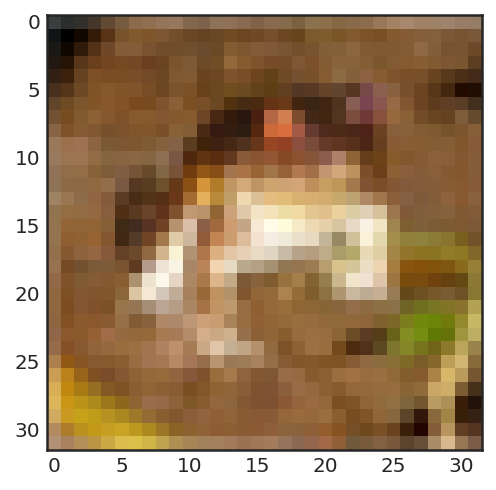

In [ ]:
plt.imshow(x_train[0])

### Some basics Image Filters and Functions

**Blurring** is useful when there is noise in an image you want to remove.

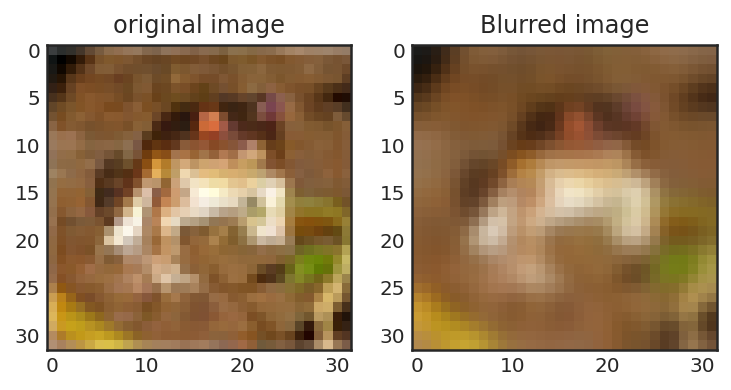

In [ ]:
blur_img = x_train[0].copy()
blur_img = cv2.GaussianBlur(blur_img, (41, 41), 1)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,2, 2)
plt.imshow(blur_img)
plt.title('Blurred image')
plt.show(block=True)

**Dilation**, as it sounds, dilates pixel neighbourhoods by finding maximums over the image by the kernel size given. This is useful for expanding selections

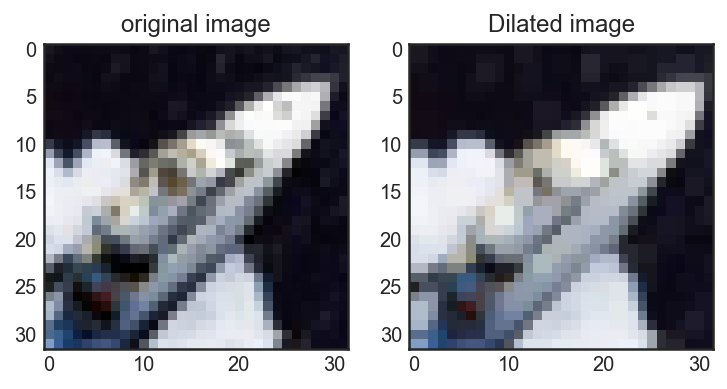

In [ ]:
dilate_img = x_train[0].copy()
dilate_img = cv2.dilate(dilate_img, np.ones((2,2), dtype=np.uint8), iterations=1)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,2, 2)
plt.imshow(dilate_img)
plt.title('Dilated image')
plt.show(block=True)

**Erosion** is the opposite of dilation, useful for remove noise

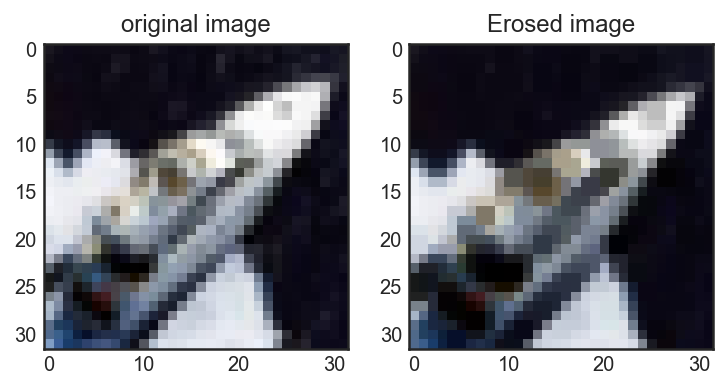

In [ ]:
erosion_img = x_train[0].copy()
erosion_img = cv2.erode(erosion_img, np.ones((2,2), dtype=np.uint8), iterations=1)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,2, 2)
plt.imshow(erosion_img)
plt.title('Erosed image')
plt.show(block=True)

**Canny edge detector** : Userful for image masking

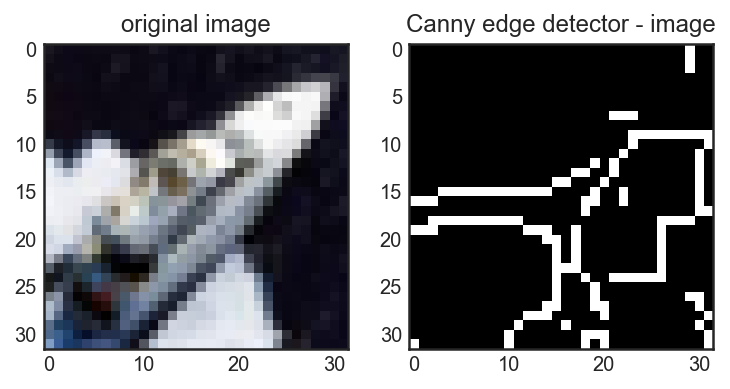

In [ ]:
canny_img = x_train[0].copy()
canny_img = cv2.erode(canny_img, np.ones((8,8), dtype=np.uint8), iterations=1)
edges = cv2.Canny(canny_img,25,25)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,2, 2)
plt.imshow(edges.astype(np.uint8), cmap='gray')
plt.title('Canny edge detector - image')
plt.show(block=True)

**Thresholding** can be thought of as a function applied to each pixel of an image. This function takes a min and max thresholding values and if the pixel value falls in this range

**Very userful with medical images**

(32, 32)


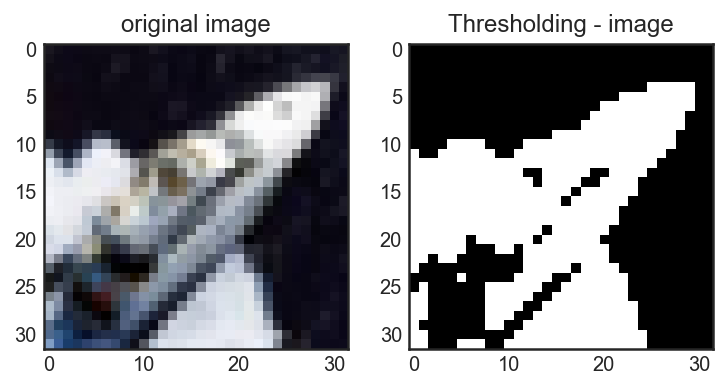

In [ ]:
thresh_img = x_train[0].copy()
thresh_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(thresh_img, 80, 255, cv2.THRESH_BINARY)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,2, 2)
plt.imshow(thresh, cmap='gray')
print(thresh.shape)
plt.title('Thresholding - image')
plt.show(block=True)

### Mask

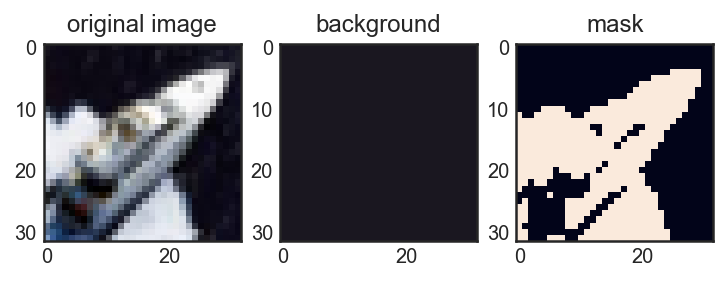

In [ ]:
bg = np.array([[[ 26,  23,  32]]*32]*32)
cv2.imwrite('bg.jpg', bg)
bg_cv = cv2.imread('bg.jpg')
cv2.imwrite('x_train.jpg', x_train[0])
x_train_cv = cv2.imread('x_train.jpg')
diff = cv2.absdiff(bg_cv, x_train_cv)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
th, mask_thresh = cv2.threshold(mask, 10, 255, cv2.THRESH_BINARY)
mask_indexes = mask_thresh > 0

f = plt.figure()
f.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title('original image')
f.add_subplot(1,3, 2)
plt.imshow(bg)
plt.title('background')
f.add_subplot(1,3,3)
plt.imshow(bg_img)
plt.title('mask')




plt.show(block=True)